In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from src import drawing_functions as df

colors={}

colors['physics']='#c73b0b'
colors['052012-theoretical-physics']='#c73b0b'

colors['startups']='#e7a136'
colors['122013-answers-onstartups']='#e7a136'

colors['astronomy']='#978e43'
colors['052012astronomy']='#978e43'

#colors['startups']='#731115'
#colors['122013-answers-onstartups']='#731115'



folder_path = 'data/processed data/'

communities = ["physics", "astronomy", "052012-theoretical-physics", "052012astronomy", 
               "052012economics", "052012-literature", "literature", "economics", 
               "startups","122013-answers-onstartups"] 

# dictionaries to keep dataframes for all communities:
data_questions = {}
data_rep_agg = {}
data_nets = {}
data_coreper = {}

for comm in communities:
    # active questions data
    # aggragated data about dynamical reputations:
    data_questions[comm] = pd.read_csv(folder_path+'active questions/%s_weekly_active_questions.csv'%(comm))
    data_rep_agg[comm] = pd.read_csv(folder_path+'%s_dynamic_reputation_aggregates.csv'%(comm))
    # interaction networks + dynamical reputations data:
    data_nets[comm] = pd.read_csv(folder_path+'%s_dyn_rep_and_networks_features.csv'%(comm))
    # core periphery data:
    data_coreper[comm] = pd.read_csv(folder_path+'%s_dyn_rep_and_core_periphery_features.csv'%(comm))

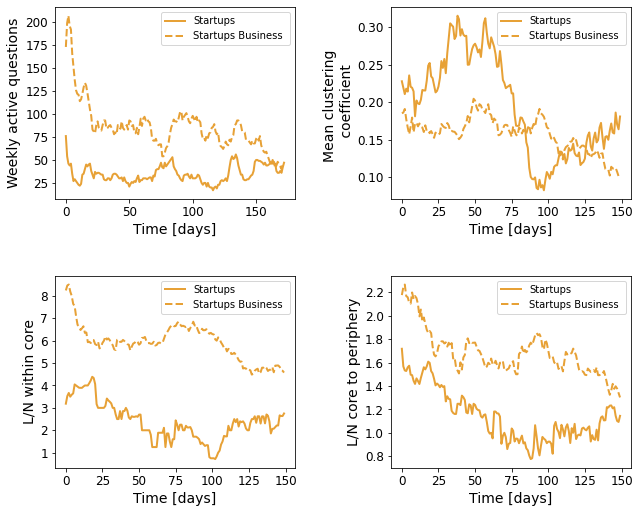

In [2]:
plt.figure(figsize = (10,8))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
    
plt.subplot(2,2,1)
df.single_panel_plot(data_questions, "startups", 'Number_of_active_questions',colors, 'Weekly active questions' )
plt.legend(["Startups", "Startups Business "])

plt.subplot(2,2,2)
df.single_panel_plot(data_nets, "startups", 'Clustering_coef',colors, 'Mean clustering \n coefficient')
plt.legend(["Startups", "Startups Business "])

plt.subplot(2,2,3)
df.single_panel_plot(data_coreper, "startups", 'LN_core',colors, 'L/N within core')
plt.legend(["Startups", "Startups Business "])

plt.subplot(2, 2, 4)
df.single_panel_plot(data_coreper, "startups", 'LN_core_periphery',colors, 'L/N core to periphery')
plt.legend(["Startups", "Startups Business "])

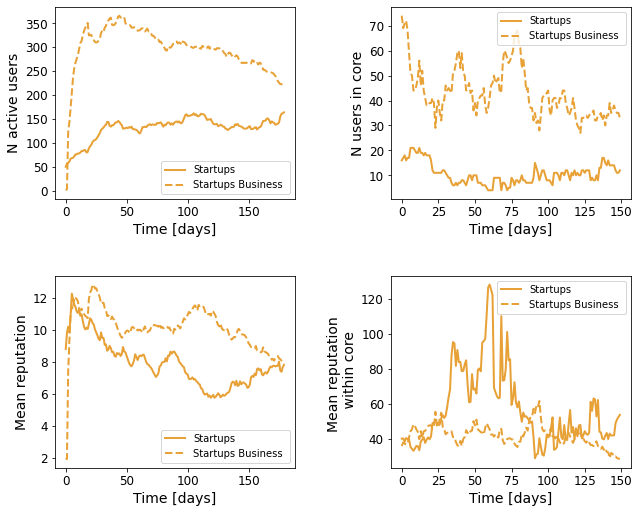

In [3]:
plt.figure(figsize = (10,8))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
    
plt.subplot(2,2,1)
df.single_panel_plot(data_rep_agg, "startups", "Number of active users", colors, "N active users")
plt.legend(["Startups", "Startups Business "])

plt.subplot(2,2,2)
df.single_panel_plot(data_coreper, "startups", 'N_core',colors, 'N users in core')
plt.legend(["Startups", "Startups Business "])

plt.subplot(2,2,3)
df.single_panel_plot(data_rep_agg, "startups", "Mean user reputation", colors, "Mean reputation")
plt.legend(["Startups", "Startups Business "])


plt.subplot(2, 2, 4)
df.single_panel_plot(data_coreper, "startups", 'Mean_dr_core',colors, 'Mean reputation \n within core')
plt.legend(["Startups", "Startups Business "])

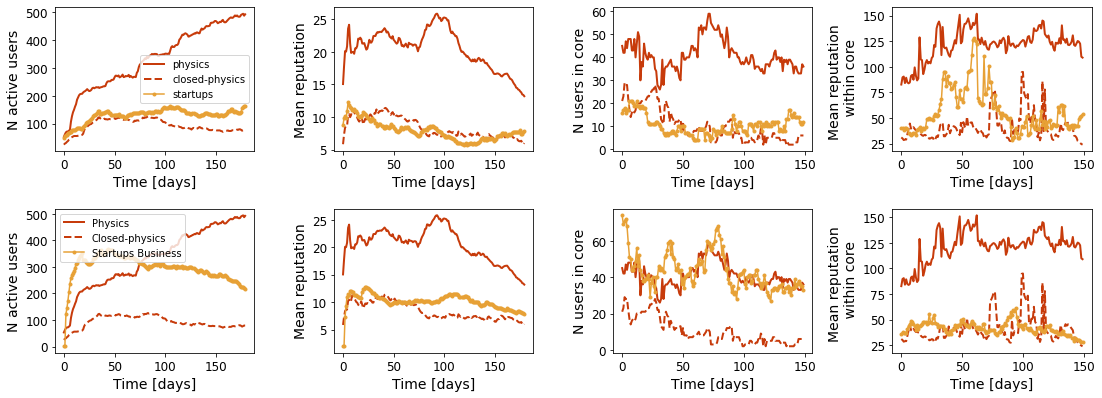

In [4]:
plt.figure(figsize = (18,6))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
    
plt.subplot(2,4,1)
df.single_panel_plot(data_rep_agg, "physics", "Number of active users", colors, "N active users")
plt.plot(data_rep_agg["startups"]["Number of active users"], ".-", color=colors["startups"], label="startups")
plt.legend(["physics", "closed-physics", "startups"])

plt.subplot(2,4,2)
df.single_panel_plot(data_rep_agg, "physics", "Mean user reputation", colors, "Mean reputation")
plt.plot(data_rep_agg["startups"]["Mean user reputation"], ".-", color=colors["startups"], label="startups")
plt.legend().set_visible(False)

plt.subplot(2,4,3)
df.single_panel_plot(data_coreper, "physics", 'N_core',colors, 'N users in core')
plt.plot(data_coreper["startups"]["N_core"], ".-", color=colors["startups"], label="startups")
plt.legend().set_visible(False)

plt.subplot(2, 4, 4)
df.single_panel_plot(data_coreper, "physics", 'Mean_dr_core',colors, 'Mean reputation \n within core')
plt.plot(data_coreper["startups"]["Mean_dr_core"], ".-", color=colors["startups"], label="startups")
plt.legend().set_visible(False)

plt.subplot(2,4,5)
df.single_panel_plot(data_rep_agg, "physics", "Number of active users", colors, "N active users")
plt.plot(data_rep_agg["122013-answers-onstartups"]["Number of active users"], ".-", color=colors["startups"], label="startups")
plt.legend(["Physics", "Closed-physics", "Startups Business"])

plt.subplot(2,4,6)
df.single_panel_plot(data_rep_agg, "physics", "Mean user reputation", colors, "Mean reputation")
plt.plot(data_rep_agg["122013-answers-onstartups"]["Mean user reputation"], ".-", color=colors["startups"], label="startups")
plt.legend().set_visible(False)

plt.subplot(2,4,7)
df.single_panel_plot(data_coreper, "physics", 'N_core',colors, 'N users in core')
plt.plot(data_coreper["122013-answers-onstartups"]["N_core"], ".-", color=colors["startups"], label="startups")
plt.legend().set_visible(False)

plt.subplot(2, 4, 8)
df.single_panel_plot(data_coreper, "physics", 'Mean_dr_core',colors, 'Mean reputation \n within core')
plt.plot(data_coreper["122013-answers-onstartups"]["Mean_dr_core"], ".-", color=colors["startups"], label="startups")
plt.legend().set_visible(False)